In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('Diwali Sales Data.csv',encoding='latin-1')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [29]:
df.shape

(11239, 13)

In [9]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
Status              float64
unnamed1            float64
dtype: object

In [11]:
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [15]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [17]:
df.dropna(inplace=True)

In [21]:
df['Amount'] = df['Amount'].astype('int')

In [23]:
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int32
dtype: object

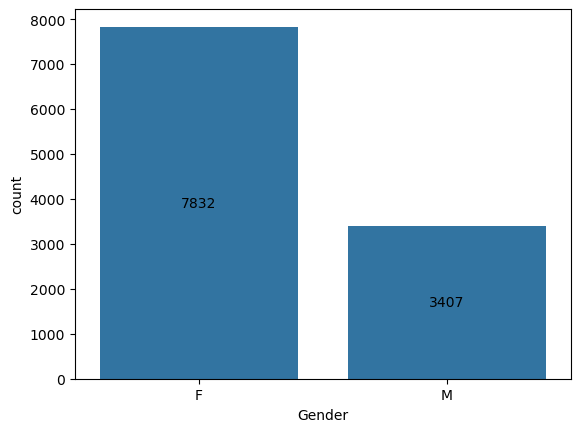

In [48]:
ax=sns.countplot(x='Gender',data=df)
for container in ax.containers:
    ax.bar_label(container, label_type='center')


In [80]:
sales = df.groupby('Gender')['Amount'].sum().sort_values(ascending=False).reset_index()
sales


,Gender,Amount
0,F,74335853
1,M,31913276


[Text(0.5, 1.0, 'Male/Female Population')]

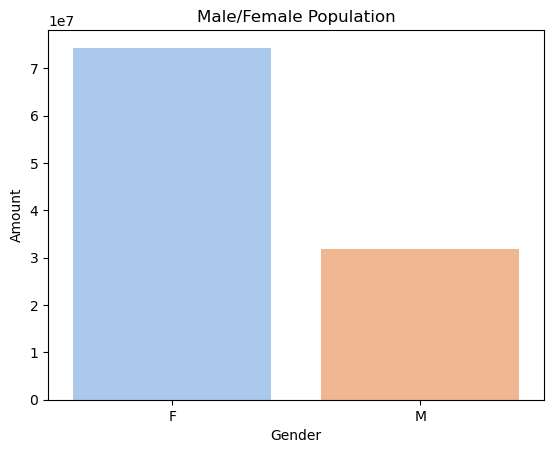

In [190]:
sns.barplot(x='Gender', y='Amount',data = sales, hue='Gender', palette='pastel').set(title='Male/Female Population')

[Text(0.5, 1.0, 'Age Group Count')]

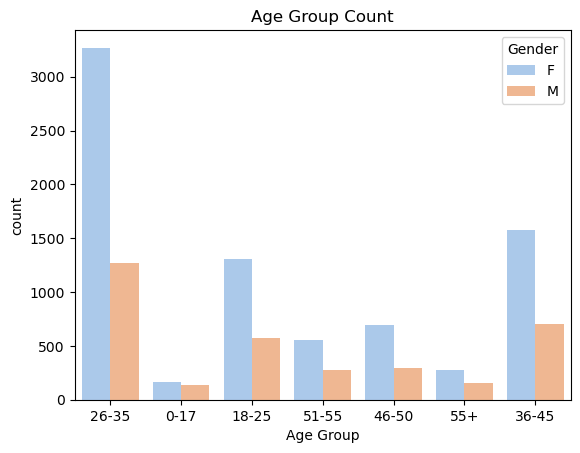

In [186]:
sns.countplot(data=df,hue='Gender',palette='pastel',x='Age Group').set(title='Age Group Count')

In [100]:
sales_age = df.groupby('Age Group')['Amount'].sum().sort_values(ascending = False).reset_index()
sales_age

,Age Group,Amount
0,26-35,42613442
1,36-45,22144994
2,18-25,17240732
3,46-50,9207844
4,51-55,8261477
5,55+,4080987
6,0-17,2699653


[Text(0.5, 1.0, 'Total Amount/Age-Group')]

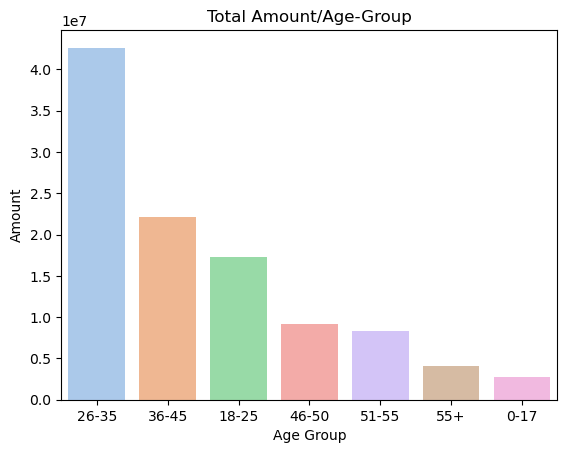

In [182]:
sns.barplot(x='Age Group', y='Amount', data = sales_age, hue = 'Age Group' , palette='pastel').set(title='Total Amount/Age-Group')

In [108]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [118]:
sales_state = df.groupby('State')['Amount'].sum().sort_values(ascending=False).reset_index()
sales_state

,State,Amount
0,Uttar Pradesh,19374968
1,Maharashtra,14427543
2,Karnataka,13523540
3,Delhi,11603818
4,Madhya Pradesh,8101142
5,Andhra Pradesh,8037146
6,Himachal Pradesh,4963368
7,Haryana,4220175
8,Bihar,4022757
9,Gujarat,3946082


[Text(0.5, 1.0, 'Total Amount/States')]

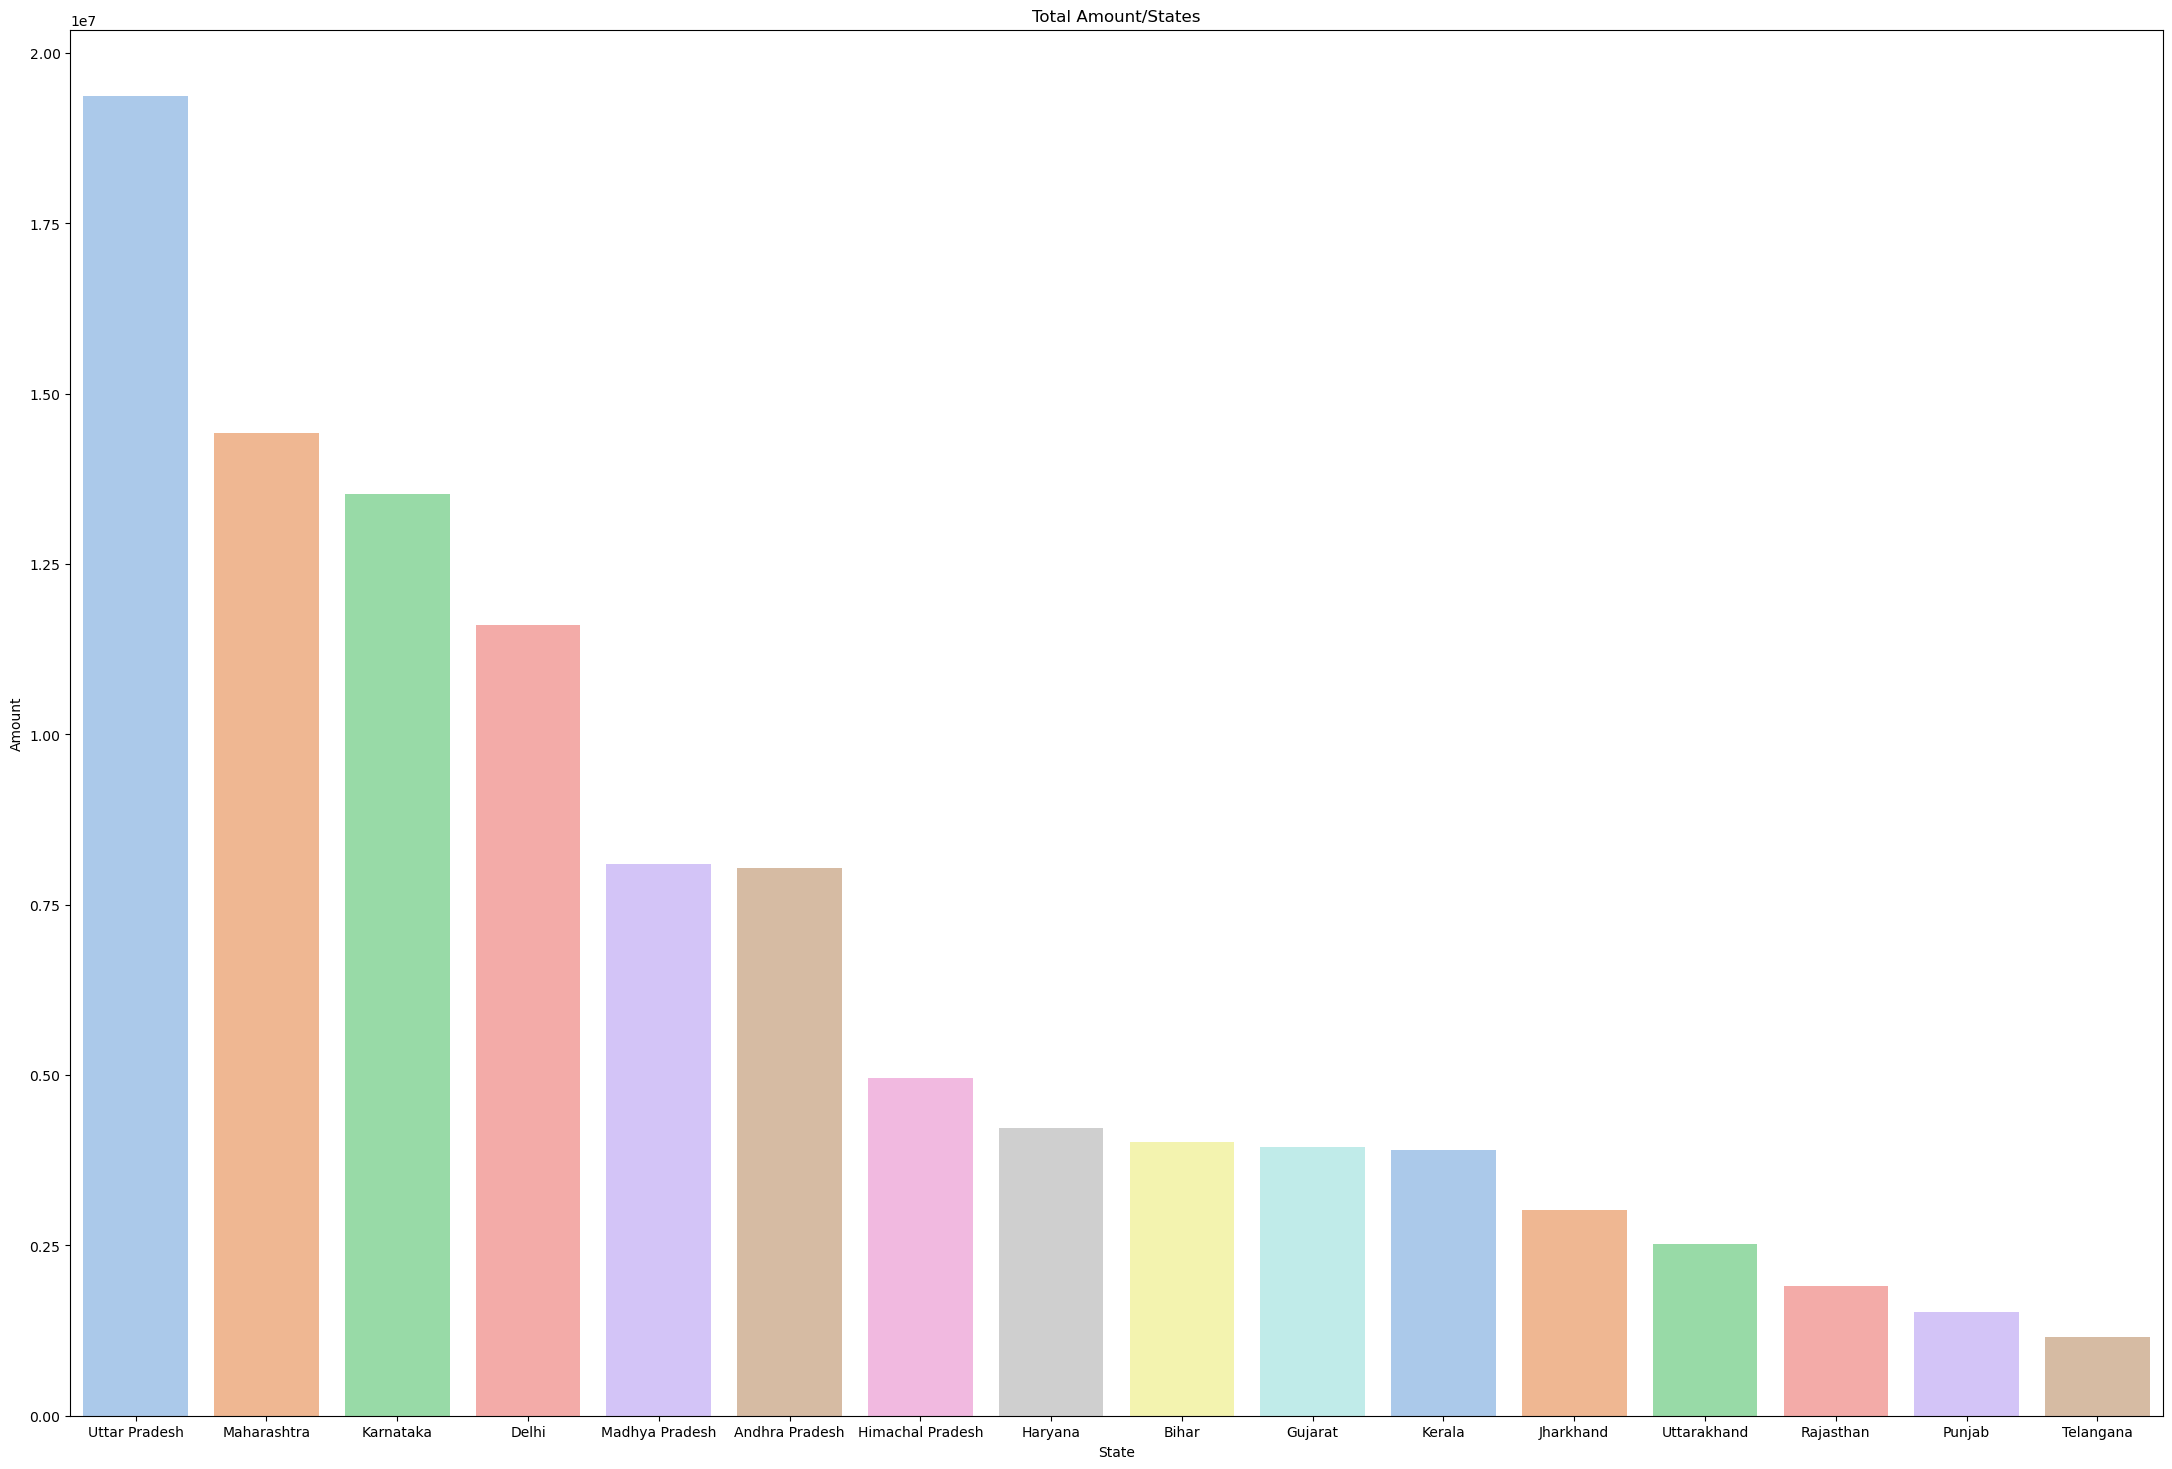

In [184]:
plt.figure(figsize=(27,18))
sns.barplot(x='State', y='Amount', data=sales_state, hue = 'State', palette = 'pastel').set(title='Total Amount/States')

[Text(0.5, 1.0, 'Total Orders/States from tp 10 states')]

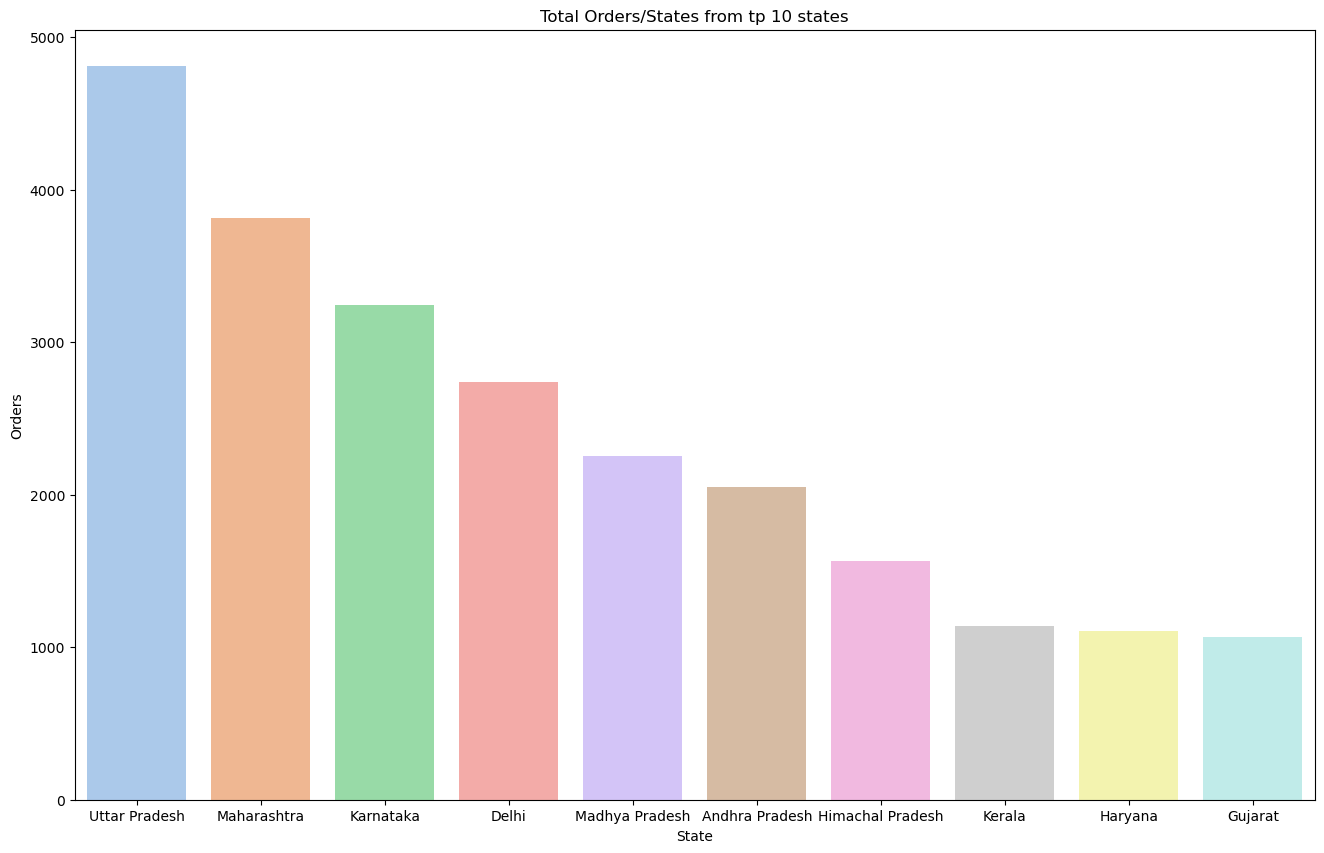

In [176]:
orders_state = df.groupby('State')['Orders'].sum().sort_values(ascending=False).reset_index().head(10)
plt.figure(figsize=(16,10))
sns.barplot(x='State', y='Orders', data=orders_state, hue = 'State', palette = 'pastel').set(title='Total Orders/States from tp 10 states')

[Text(0.5, 1.0, 'Marital Status')]

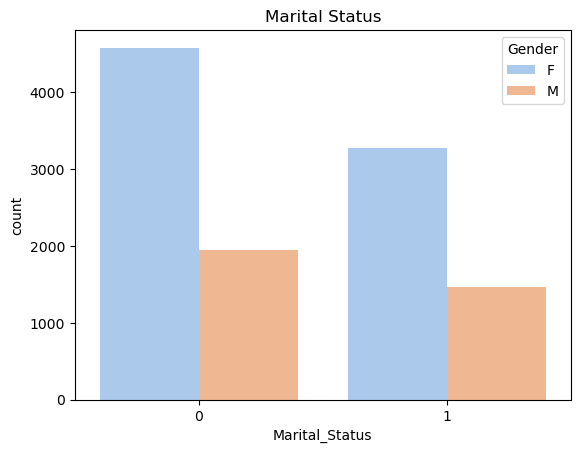

In [37]:
sns.countplot(data=df,x="Marital_Status",hue="Gender",palette="pastel").set(title="Marital Status")

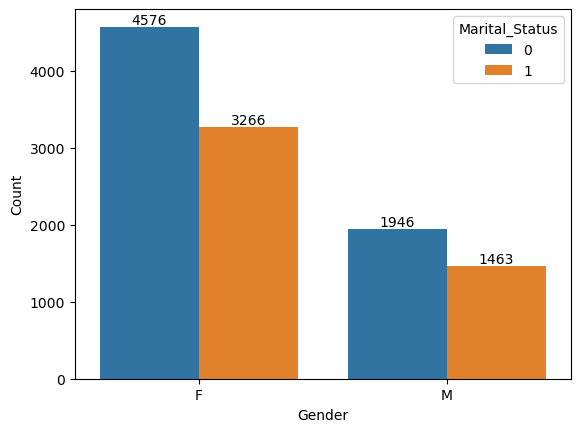

In [55]:
marital_ratio=df.groupby(['Marital_Status','Gender']).size().reset_index(name="Count")
marital_ratio
# Create a bar plot
ax = sns.barplot(x='Gender', y='Count', hue='Marital_Status', data=marital_ratio)

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container)

In [17]:
marital_sales = df.groupby(['Marital_Status','Gender'])['Amount'].sum().sort_values(ascending=False).reset_index()
marital_sales

,Marital_Status,Gender,Amount
0,0,F,43786648.44
1,1,F,30549207.99
2,0,M,18338738.00
3,1,M,13574538.00


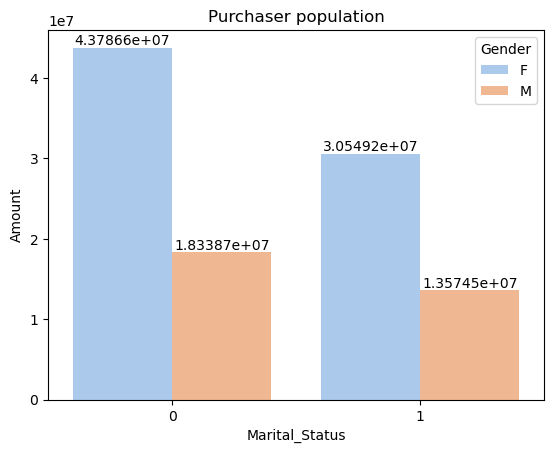

In [150]:
ax=sns.barplot(x='Marital_Status', y='Amount', data=marital_sales, hue='Gender', palette ='pastel')
ax.set(title="Purchaser population")
for container in ax.containers:
    ax.bar_label(container)

In [127]:
occupation = df['Occupation'].value_counts().reset_index()
occupation

,Occupation,count
0,IT Sector,1588
1,Healthcare,1408
2,Aviation,1310
3,Banking,1139
4,Govt,854
5,Hospitality,705
6,Media,637
7,Automobile,566
8,Chemical,542
9,Lawyer,531


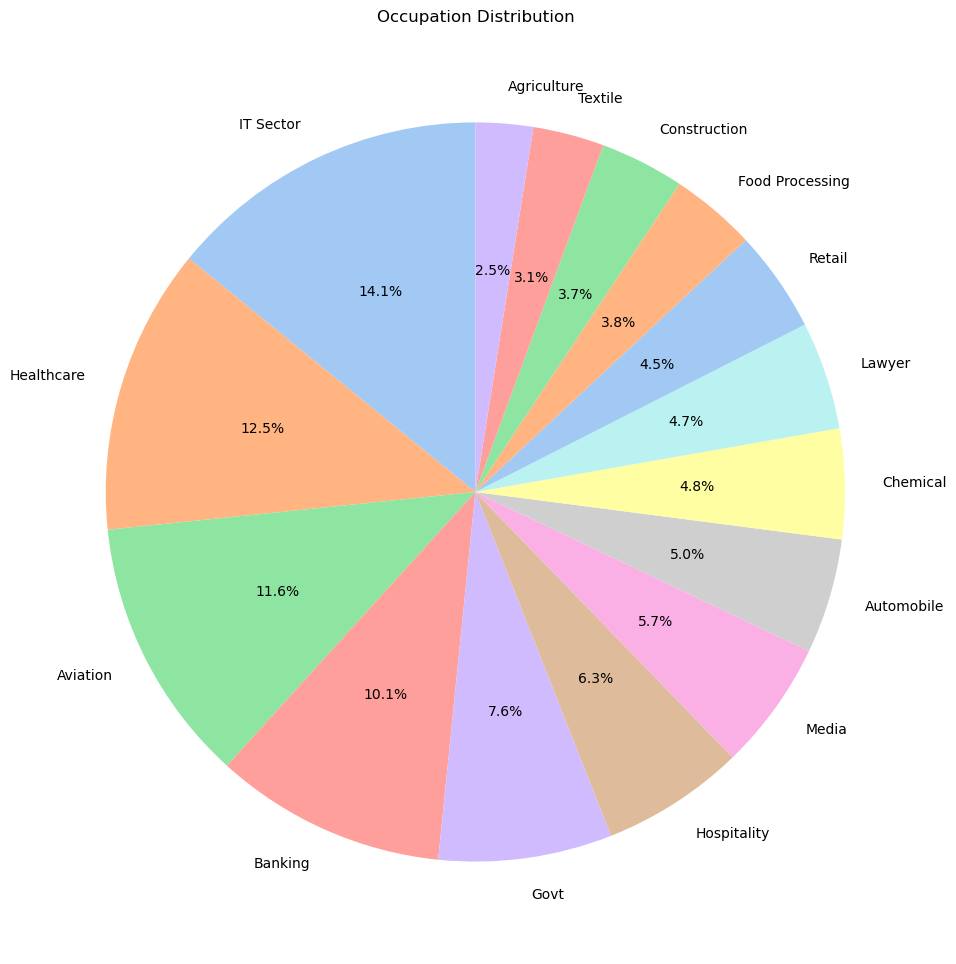

In [141]:
occupation = df['Occupation'].value_counts().reset_index()
occupation
plt.figure(figsize=(13, 12))
plt.pie(occupation['count'],
    labels=occupation['Occupation'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("pastel"))
plt.title("Occupation Distribution")
plt.show()

In [91]:
ocuupation_ratio = df.groupby(['Occupation','Gender']).size().reset_index(name='Count')
ocuupation_ratio


,Occupation,Gender,Count
0,Agriculture,F,203
1,Agriculture,M,80
2,Automobile,F,392
3,Automobile,M,174
4,Aviation,F,932
5,Aviation,M,378
6,Banking,F,825
7,Banking,M,314
8,Chemical,F,379
9,Chemical,M,163


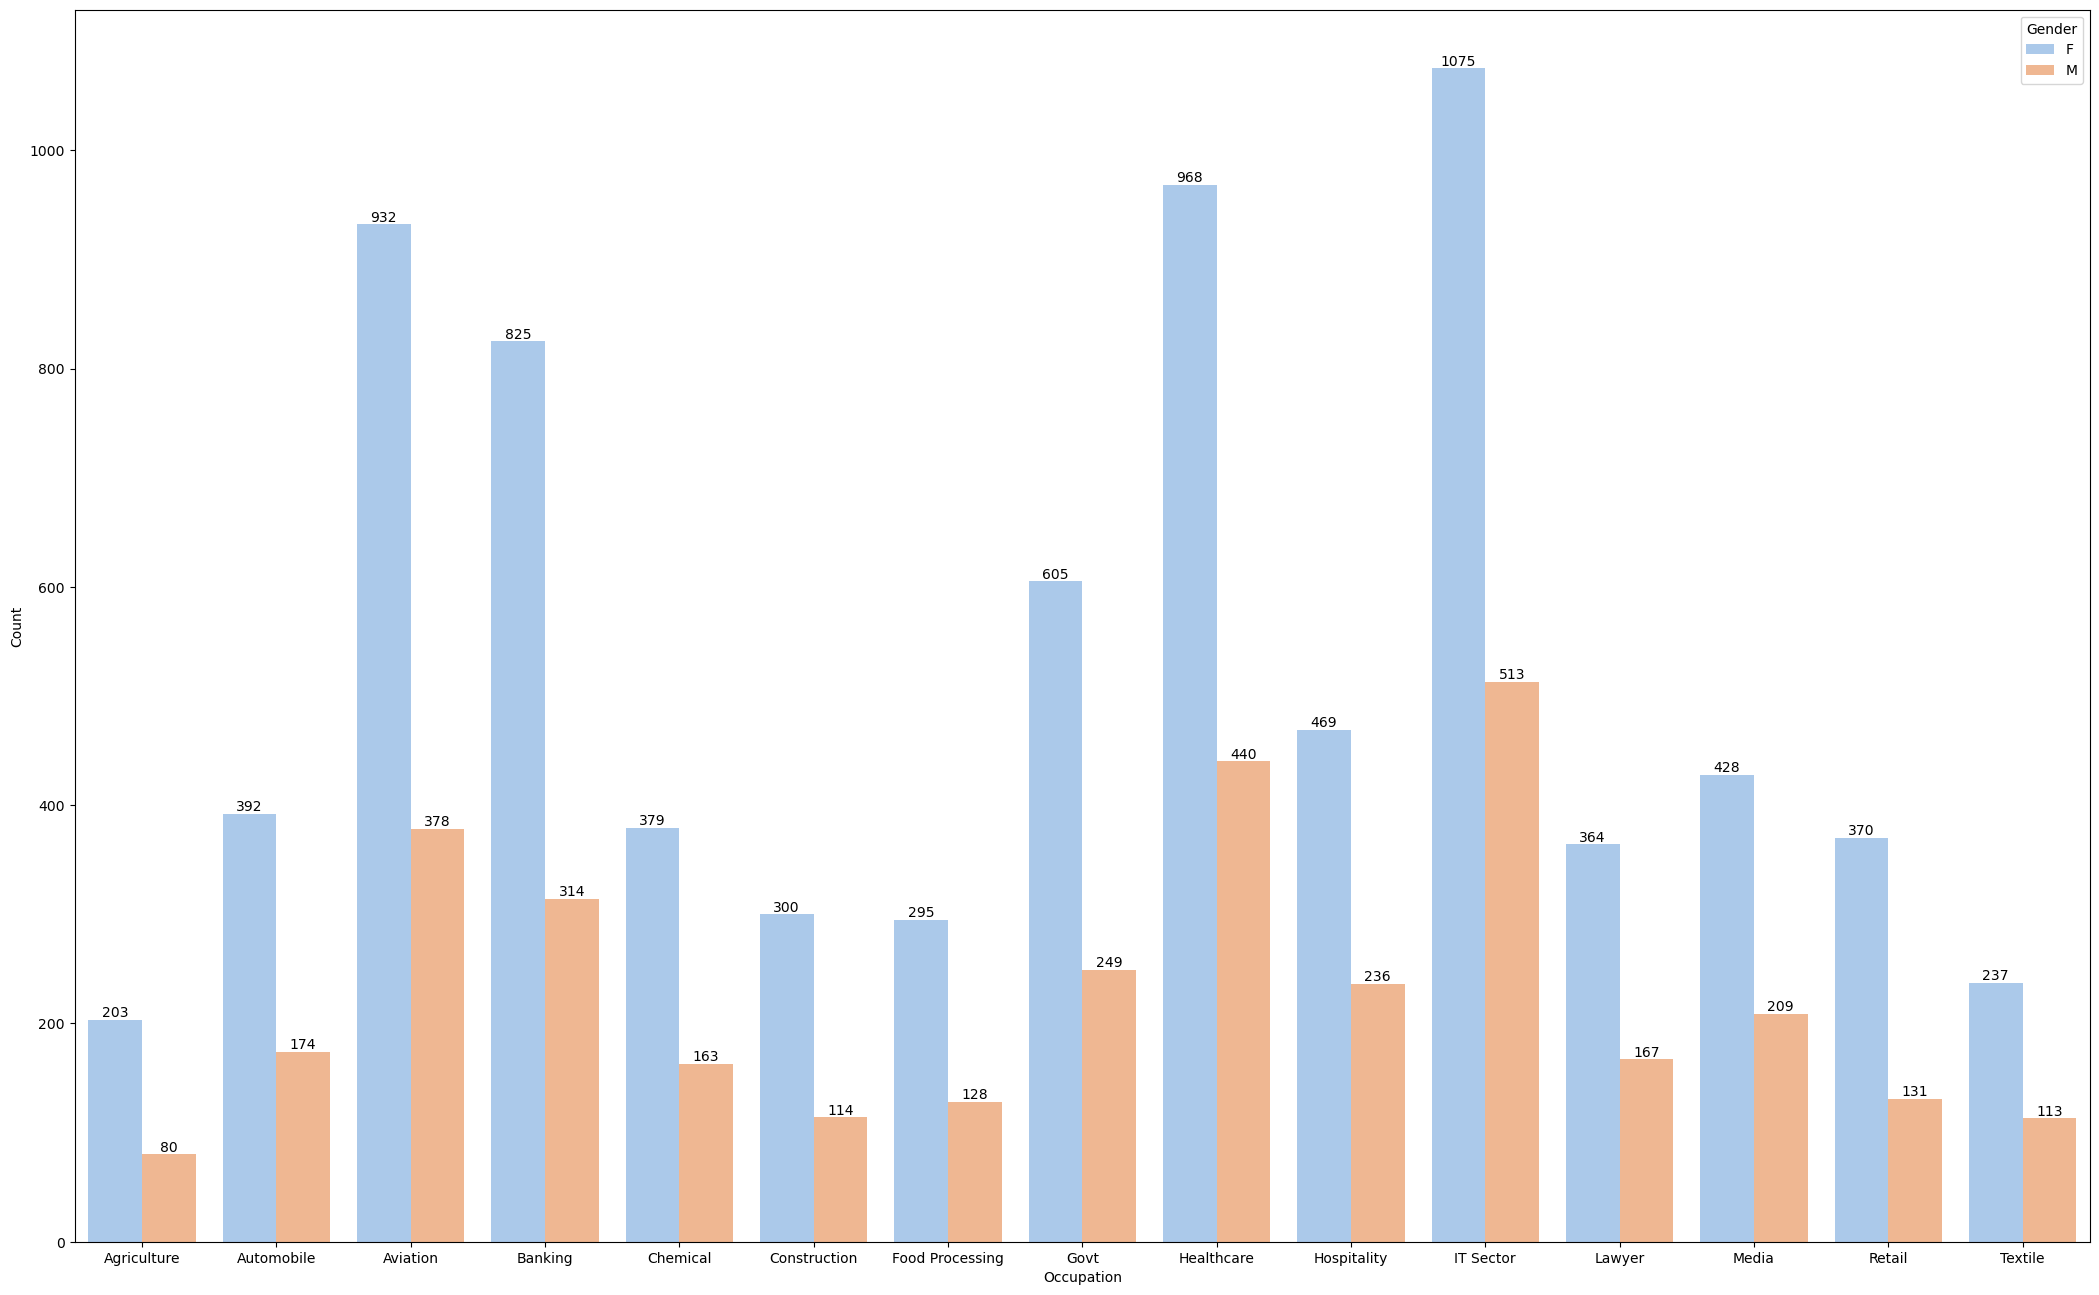

In [113]:
plt.figure(figsize=(26,16))
ax=sns.barplot(x='Occupation',y='Count',data=ocuupation_ratio,hue='Gender',palette='pastel')
for container in ax.containers:
    ax.bar_label(container)

In [164]:
product_sales = df.groupby('Product_ID')['Orders'].sum().sort_values(ascending=False).reset_index()
product_sales.head(10)

,Product_ID,Orders
0,P00265242,127
1,P00110942,116
2,P00237542,91
3,P00184942,82
4,P00114942,79
5,P00025442,79
6,P00145042,76
7,P00117942,76
8,P00044442,75
9,P00110842,74


<Axes: xlabel='Product_ID'>

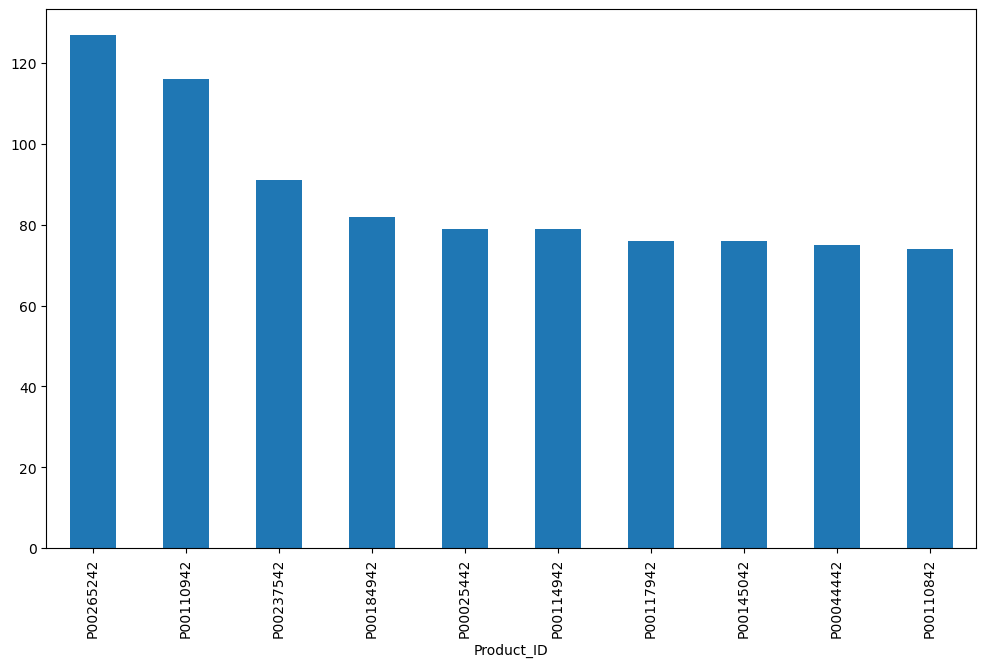

In [162]:
fig1,ax1 =plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')